
**Introduction**

**From anime dataset, I created recommendation system which use clustering technique.
Recommended anime were extracted from characteristic of cluster.
User was segmented by user anime rating history. (Select only movie which user really like**

In this kernel,

    Data wrangling
    K mean clustering
    Characteristic of each cluster



In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

In [ ]:
anime = pd.read_csv('sample_data/anime.csv')

In [ ]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
print(anime.shape)

(12294, 7)


In [ ]:
user = pd.read_csv('sample_data/rating.csv')

In [ ]:
user.head(10)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


In [ ]:
print(user.shape)

(84069, 3)


**Definition of Like**

**Because  of many users, many differences criteria for rating anime.
Then, I decide to find rating mean of each user.
Anime which got rating higher than user rating mean will assign as like.** 

In [ ]:
# User 1 has a negative in rating mean

user[user['user_id']==1].rating.mean()

-0.7124183006535948

In [ ]:
# User 2 has a very low in rating mean

user[user['user_id']==2].rating.mean()

2.6666666666666665

In [ ]:
# Rating mean of user 5 is very close to 5 which is half of max rating

user[user['user_id']==5].rating.mean()

4.263383297644539

**Calculate mean rating per user**

In [ ]:
MRPU = user.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']

MRPU.drop(['anime_id','rating'],axis=1, inplace=True)

In [ ]:
MRPU.head(10)

,user_id,mean_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979
3,4,-1.000000
4,5,4.263383
5,6,-1.000000
6,7,7.387755
7,8,8.333333
8,9,8.000000
9,10,2.875000


In [ ]:
user = pd.merge(user,MRPU,on=['user_id','user_id'])

In [ ]:
user.head(5)

,user_id,anime_id,rating,mean_rating
0,1,20,-1,-0.712418
1,1,24,-1,-0.712418
2,1,79,-1,-0.712418
3,1,226,-1,-0.712418
4,1,241,-1,-0.712418


In [ ]:
user = user.drop(user[user.rating < user.mean_rating].index)

In [ ]:
# 3 anime were assigned as user 1 favorite anime

user[user['user_id']== 1].head(10)

,user_id,anime_id,rating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418


In [ ]:
# user2 favorite only one anime

user[user['user_id']== 2].head(10)

,user_id,anime_id,rating,mean_rating
153,2,11771,10,2.666667


In [ ]:
user[user['user_id']== 5].head(10)

,user_id,anime_id,rating,mean_rating
302,5,6,8,4.263383
303,5,15,6,4.263383
304,5,17,6,4.263383
305,5,18,6,4.263383
306,5,20,6,4.263383
307,5,22,5,4.263383
310,5,45,7,4.263383
311,5,47,8,4.263383
312,5,57,7,4.263383
314,5,67,6,4.263383


In [ ]:
print(user.shape)



(45234, 4)


In [ ]:
user["user_id"].unique()



array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
user = user.rename({'rating':'userRating'}, axis='columns')


**Combine two datasets**


**In this kernel, I decide to reduce size of dataset, because of running time**



In [ ]:
# merge 2 dataset
mergedata = pd.merge(anime,user,on=['anime_id','anime_id'])
mergedata= mergedata[mergedata.user_id <= 20000]
mergedata.head(10)

,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10,-0.832298
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8,7.374593
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,490,10,8.062500
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548,10,8.112360
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,570,10,8.388889
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10,8.680328


In [ ]:
len(mergedata['anime_id'].unique())

3571

In [ ]:
len(anime['anime_id'].unique())

12294


**Create Crosstable**

**Show detail of anime which each user like**



In [ ]:
user_anime = pd.crosstab(mergedata['user_id'], mergedata['name'])
user_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Trilogy,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,.hack//Roots,.hack//Sign,...,ef: A Tale of Memories. - Prologue,gdgd Fairies,gdgd Fairies 2,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
user_anime.shape

(869, 3571)


**Principal component analysis**

**Principal Component Analysis converts our original variables to a new set of variables, which are a linear combination of the original set of variables.My main goal is to reduce dimension of data for clustering and visualize**



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(user_anime)
pca_samples = pca.transform(user_anime)

In [ ]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2
0,-1.560007,0.777714,-0.017019
1,-1.776424,0.420310,-0.007615
2,0.298575,-0.225358,-0.628953
3,0.211233,0.406985,0.425036
4,3.437242,-1.402865,0.076774


In [ ]:
tocluster = pd.DataFrame(ps[[0,1,2]])

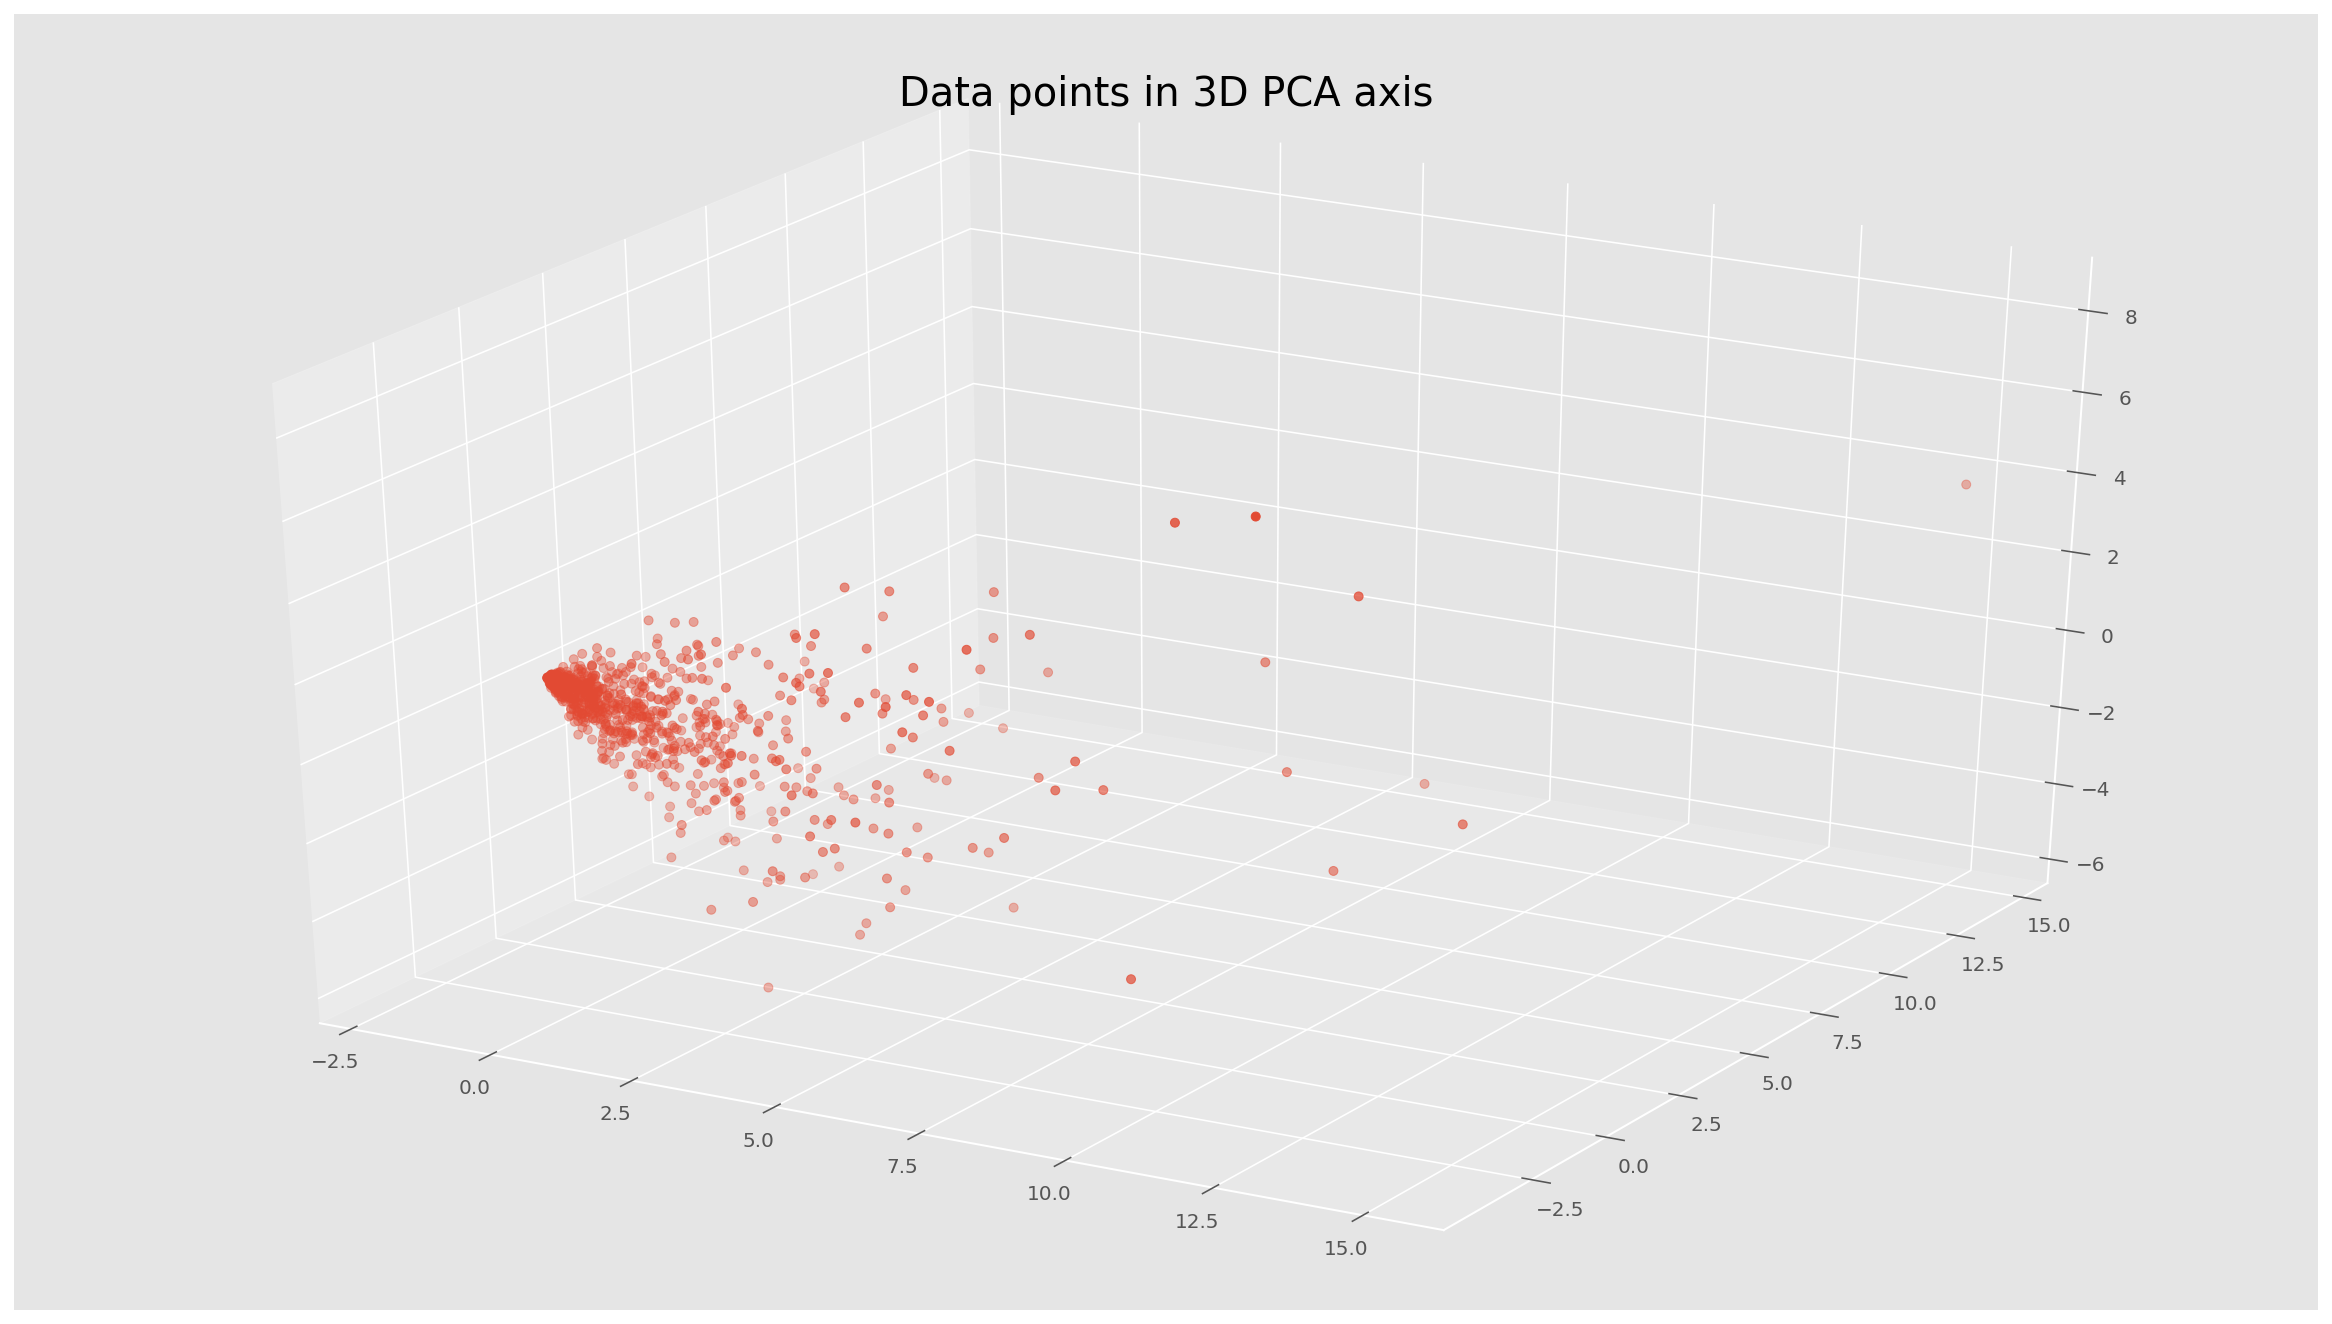

In [ ]:
plt.rcParams['figure.figsize'] = (16, 9)


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

**Selecting number of K**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(8)

for i in range(2,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster, kmeans.labels_))

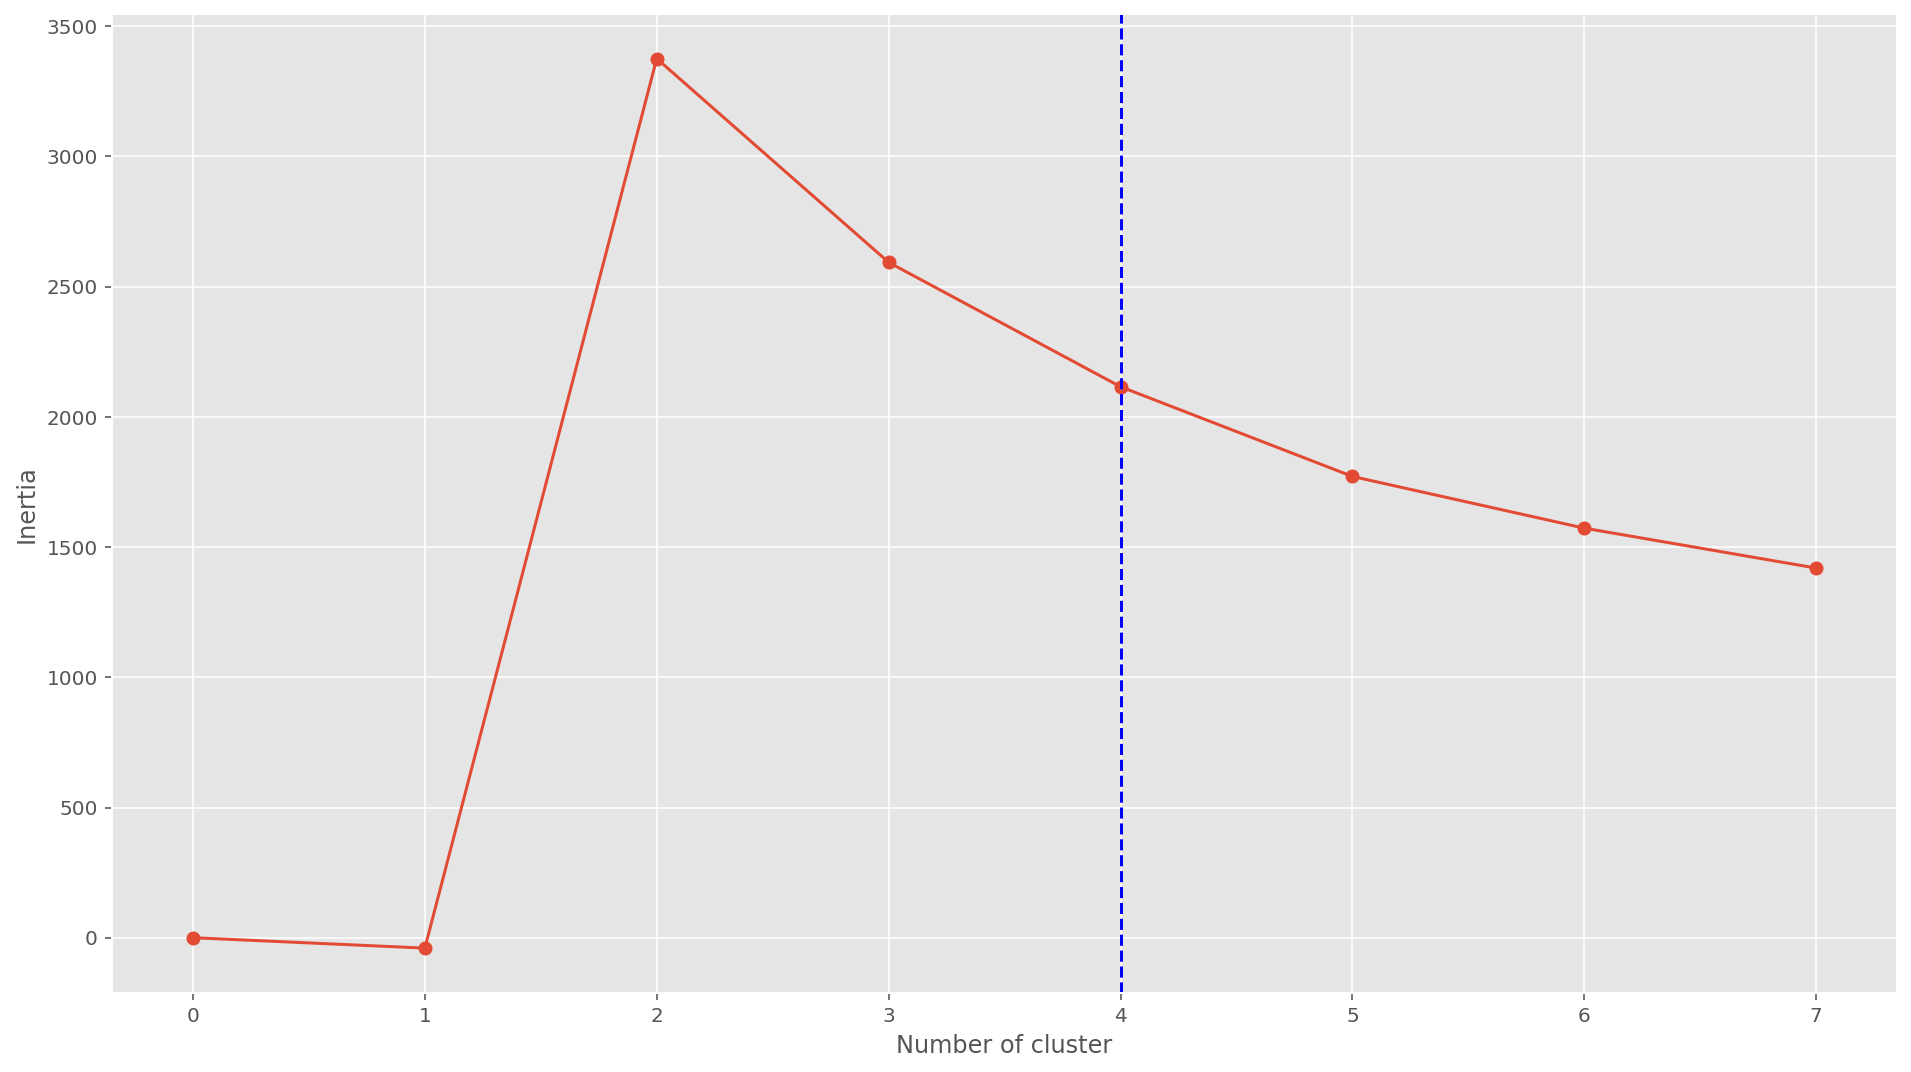

In [ ]:
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

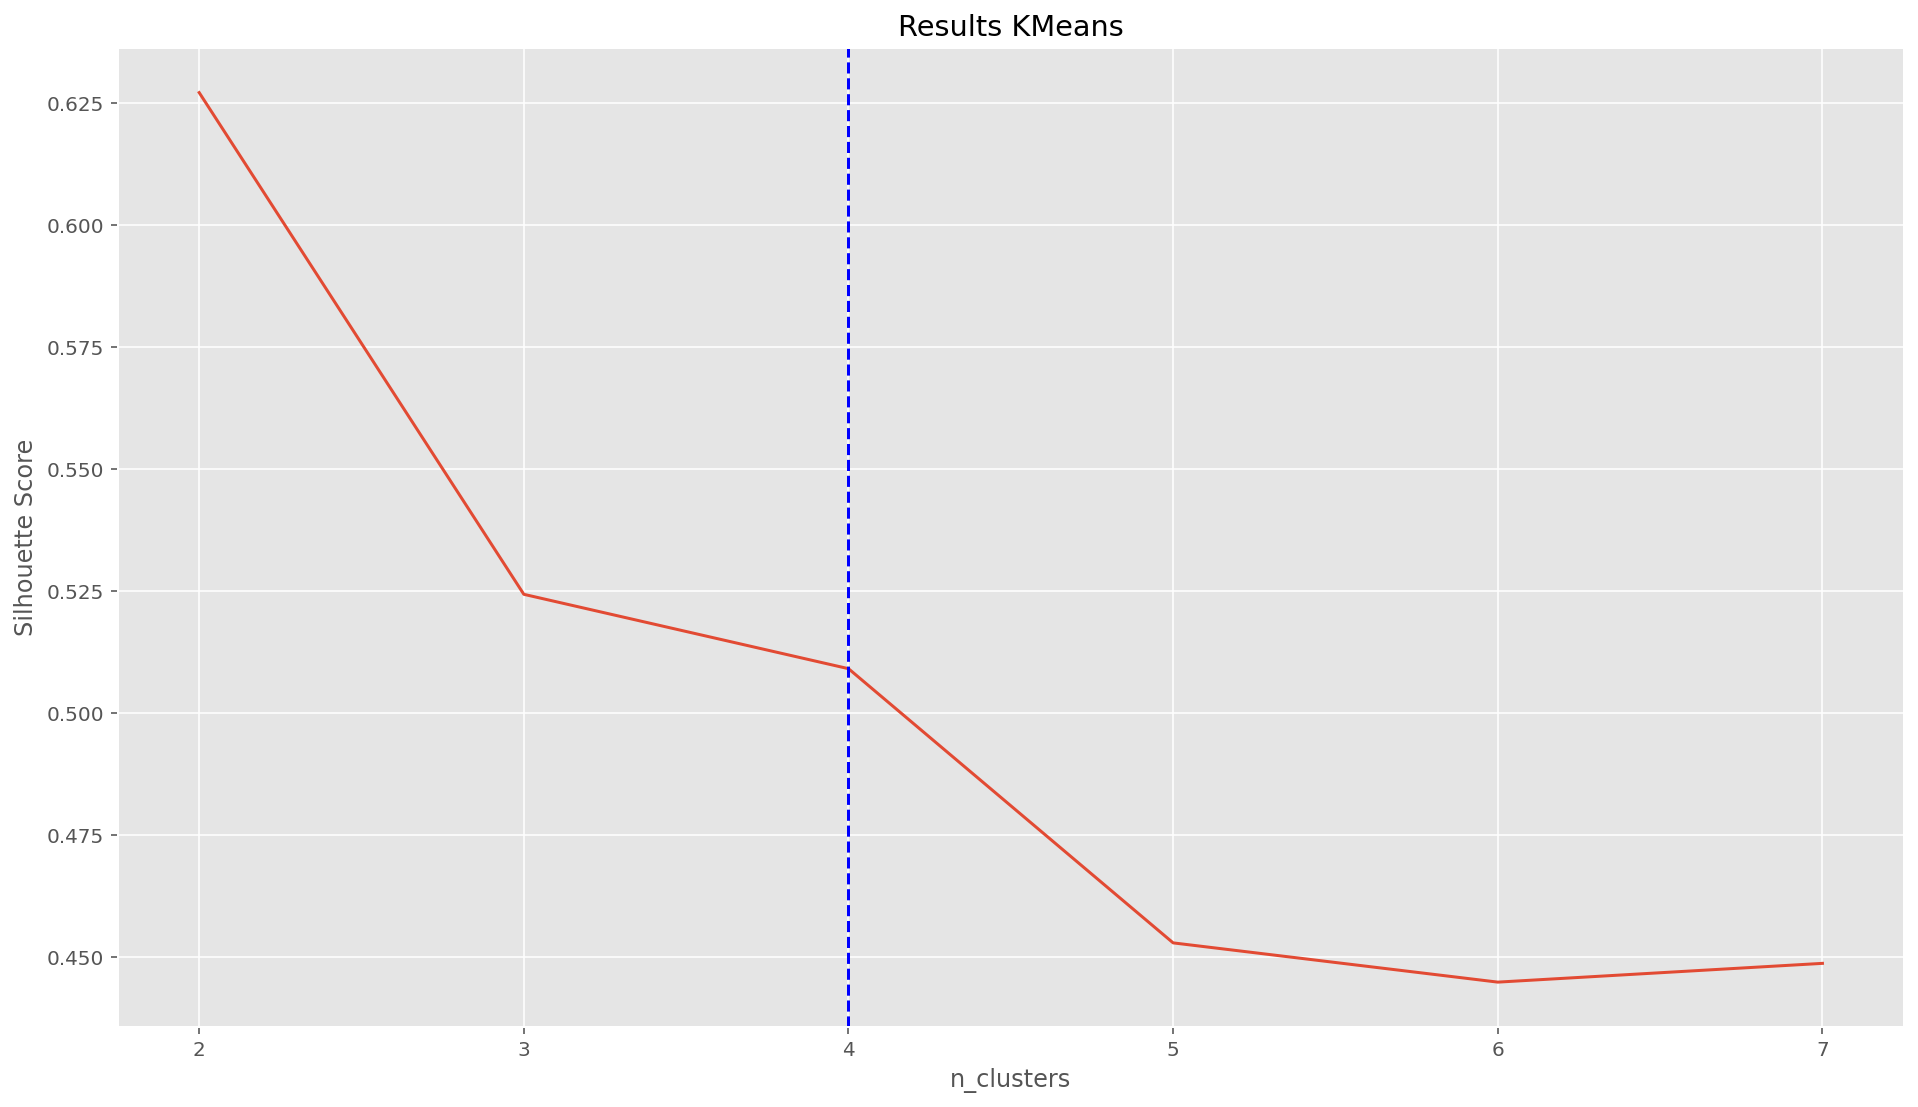

In [ ]:
plt.plot(range(2,8), scores);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Silhouette Score');
plt.show()

**K means clustering**

In [ ]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=4,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

print(centers)

[[-1.09979962  0.1965913   0.04798008]
 [11.02763578  2.43648324  3.25799249]
 [ 4.32608532  0.82901427 -1.03956667]
 [ 1.35337381 -1.1540359   0.11616513]]


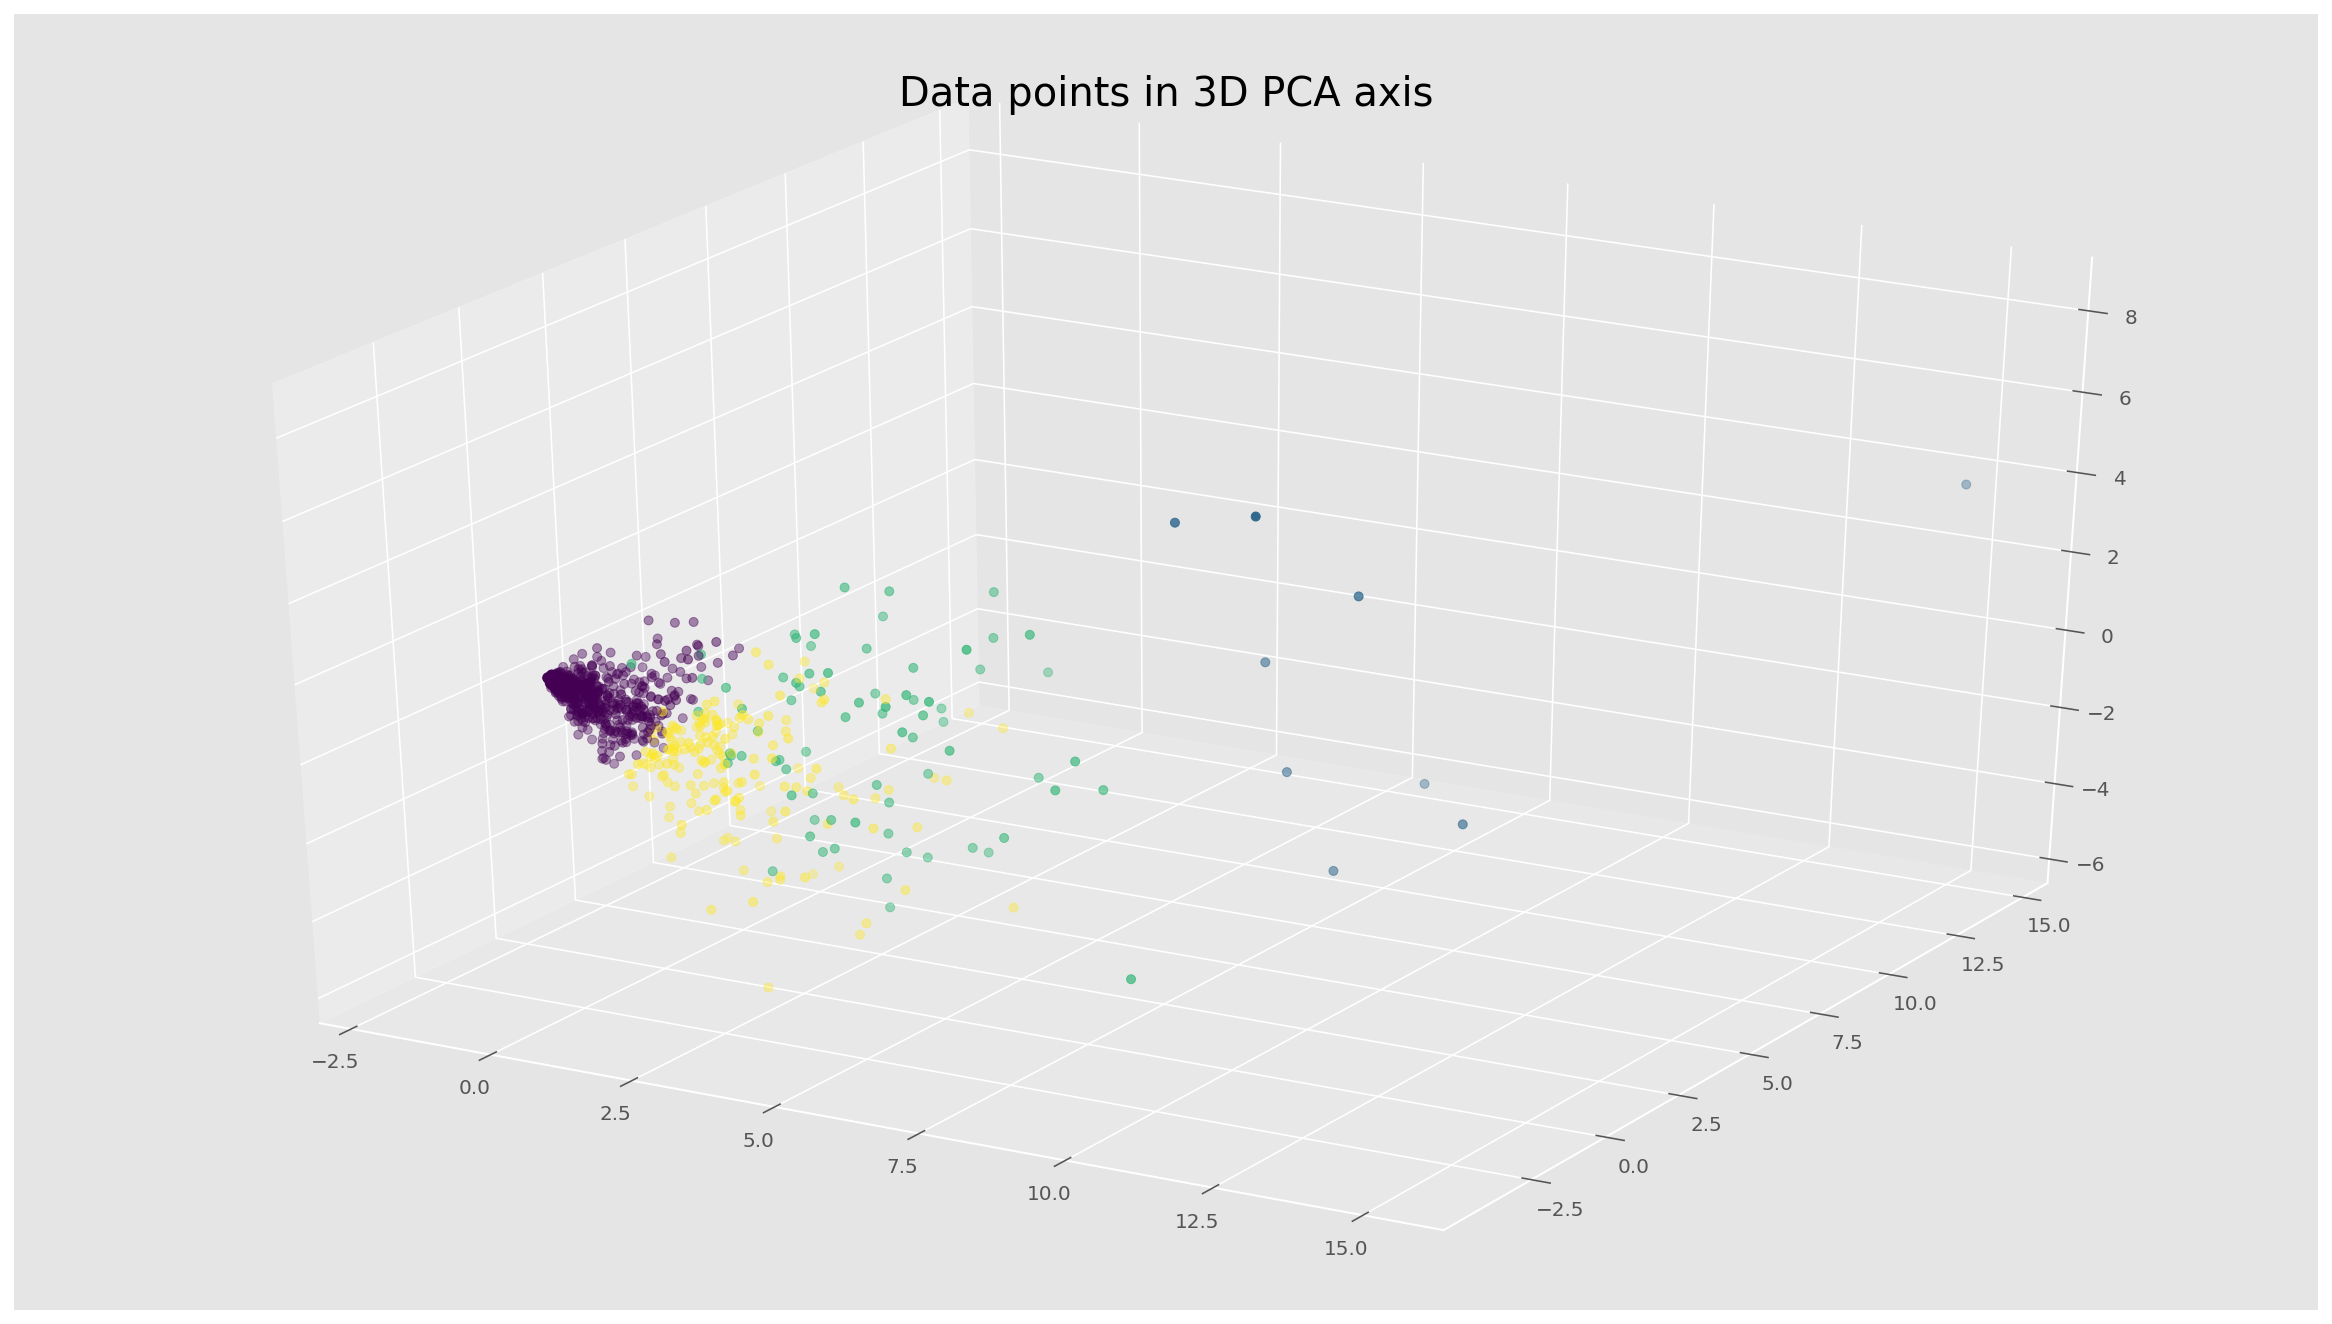

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)

plt.show()

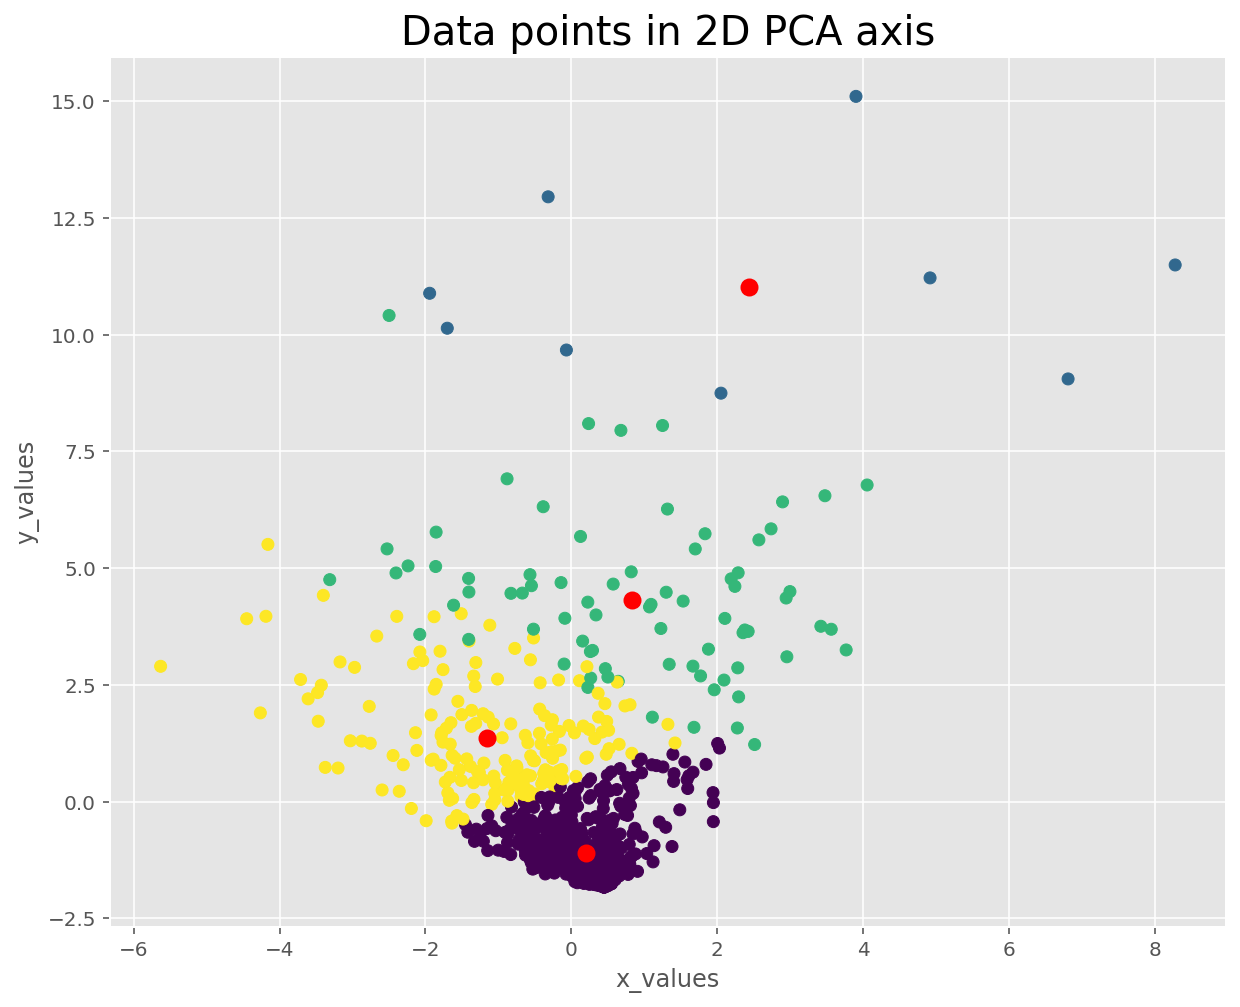

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

In [ ]:
user_anime['cluster'] = c_preds


user_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Trilogy,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,.hack//Roots,.hack//Sign,...,gdgd Fairies,gdgd Fairies 2,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
user_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 1 to 869
Columns: 3572 entries, &quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi to cluster
dtypes: int32(1), int64(3571)
memory usage: 23.7 MB



**Characteristic of each cluster**

In [ ]:
c0 = user_anime[user_anime['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_anime[user_anime['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_anime[user_anime['cluster']==2].drop('cluster',axis=1).mean()
c3 = user_anime[user_anime['cluster']==3].drop('cluster',axis=1).mean()




**Cluster 0**

**Top 15 anime which will explain characteristic of this cluster**

In [ ]:
c0.sort_values(ascending=False)[0:15]

name
Death Note                            0.296540
Sword Art Online                      0.294893
Shingeki no Kyojin                    0.278418
Fullmetal Alchemist: Brotherhood      0.219110
Angel Beats!                          0.207578
Mirai Nikki (TV)                      0.166392
Ao no Exorcist                        0.148270
Code Geass: Hangyaku no Lelouch       0.146623
Sen to Chihiro no Kamikakushi         0.135091
Naruto                                0.133443
Steins;Gate                           0.128501
Code Geass: Hangyaku no Lelouch R2    0.126853
Fullmetal Alchemist                   0.126853
Elfen Lied                            0.123558
Ouran Koukou Host Club                0.120264
dtype: float64

In [ ]:
def createAnimeInfoList(animelist):
    episode_list = list()
    genre_list = list()
    member_list = list()
    rating_list= list()
    for x in anime['name']:
        if x in animelist:
            episode_list.append(anime[anime['name']==x].episodes.values.astype(int))
            member_list.append(anime[anime['name']==x].members.values.astype(int))
            rating_list.append(anime[anime['name']==x].rating.values.astype(int))
            for y in anime[anime['name']==x].genre.values:
                 genre_list.append(y)
    return genre_list,episode_list,rating_list,member_list

In [ ]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split(','):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [ ]:
animelist = list(c0.index)
data = pd.DataFrame()
data['genre'],data['episode'],data['rating'],data['member'] =  createAnimeInfoList(animelist)

In [ ]:
set_keywords = set()
for liste_keywords in data['genre'].str.split(',').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)

In [ ]:
from wordcloud import WordCloud

def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=20,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

**Favorite genre for this cluster**

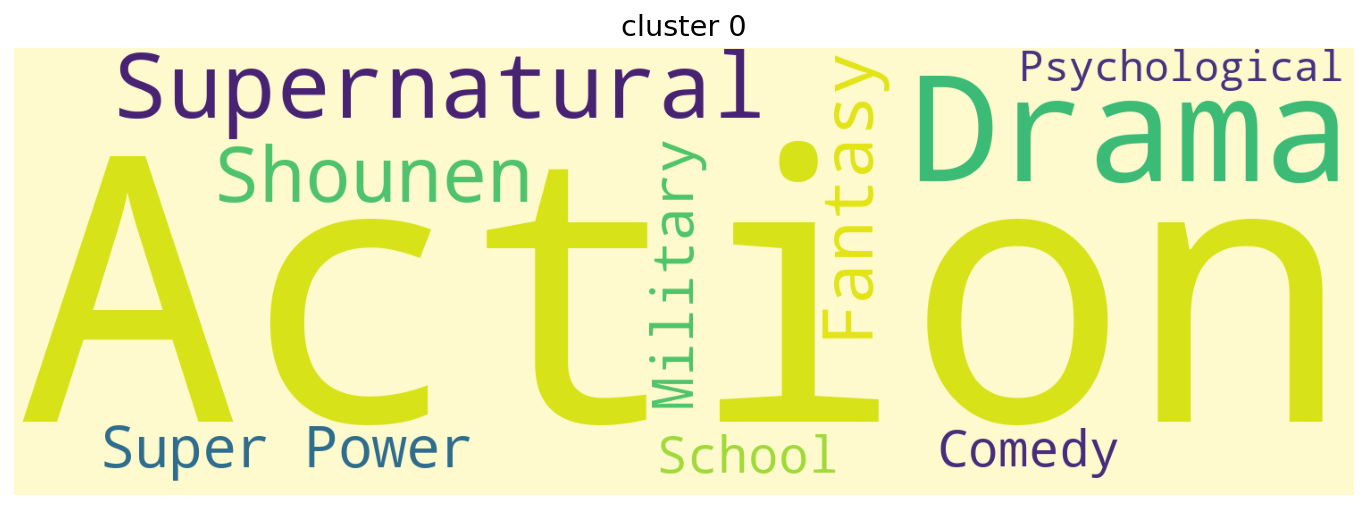

In [ ]:
c0_animelist = list(c0.sort_values(ascending=False)[0:15].index)
c0_data = pd.DataFrame()
c0_data['genre'],c0_data['episode'],c0_data['rating'],c0_data['member'] =  createAnimeInfoList(c0_animelist)
c0_data.iloc[:,1:4] = c0_data.iloc[:,1:4].astype(int) # change to numeric object to integer
keyword_occurences, dum = count_word(c0_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 0","lemonchiffon")

In [ ]:
keyword_occurences[0:5]

[['Action', 11],
 [' Drama', 7],
 [' Supernatural', 6],
 [' Shounen', 6],
 [' Fantasy', 5]]

Average of each information for anime which user in this cluster like

In [ ]:
print('cluster 0\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c0_data['episode'].mean(), c0_data['rating'].mean(),c0_data['member'].mean()))



cluster 0
AVG episode : 40.0
AVG movie rating : 7.866666666666666
AVG member : 687536.5333333333


**Cluster 1**

In [ ]:
c1.sort_values(ascending=False)[0:15]

name
Mirai Nikki (TV)                                            1.000000
Yahari Ore no Seishun Love Comedy wa Machigatteiru.         1.000000
Mayo Chiki!                                                 1.000000
Shingeki no Kyojin                                          0.888889
Hentai Ouji to Warawanai Neko.                              0.888889
Zero no Tsukaima                                            0.888889
Death Note                                                  0.888889
Sankarea                                                    0.888889
Angel Beats!                                                0.888889
Kore wa Zombie Desu ka?                                     0.888889
Another                                                     0.888889
Kuroko no Basket                                            0.888889
Bakemonogatari                                              0.888889
Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka    0.888889
Kuroko no Basket 2nd Season  

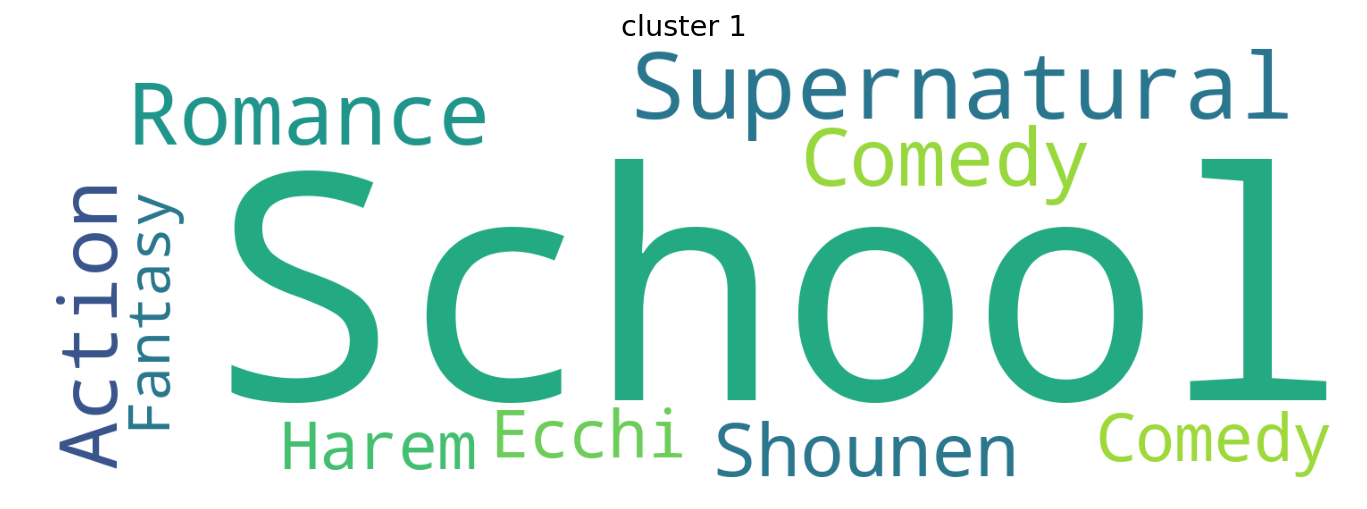

In [ ]:
c1_animelist = list(c1.sort_values(ascending=False)[0:15].index)
c1_data = pd.DataFrame()
c1_data['genre'],c1_data['episode'],c1_data['rating'],c1_data['member'] =  createAnimeInfoList(c1_animelist)
c1_data.iloc[:,1:4] = c1_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c1_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 1","white")



In [ ]:
keyword_occurences[0:5]

[[' School', 8],
 [' Supernatural', 8],
 [' Romance', 7],
 ['Action', 6],
 ['Comedy', 6]]

In [ ]:
print('cluster 1\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c1_data['episode'].mean(), c1_data['rating'].mean(),c1_data['member'].mean()))

cluster 1
AVG episode : 17.733333333333334
AVG movie rating : 7.533333333333333
AVG member : 455542.86666666664


**Cluster 2**

In [ ]:
c2.sort_values(ascending=False)[0:15]



name
No Game No Life                                        0.763158
Shingeki no Kyojin                                     0.763158
Sword Art Online                                       0.723684
Mirai Nikki (TV)                                       0.710526
Steins;Gate                                            0.671053
Bakemonogatari                                         0.657895
One Punch Man                                          0.644737
Toradora!                                              0.644737
Sakurasou no Pet na Kanojo                             0.631579
Yahari Ore no Seishun Love Comedy wa Machigatteiru.    0.631579
Angel Beats!                                           0.605263
Noragami                                               0.605263
Tokyo Ghoul                                            0.592105
Fullmetal Alchemist: Brotherhood                       0.578947
Code Geass: Hangyaku no Lelouch                        0.578947
dtype: float64

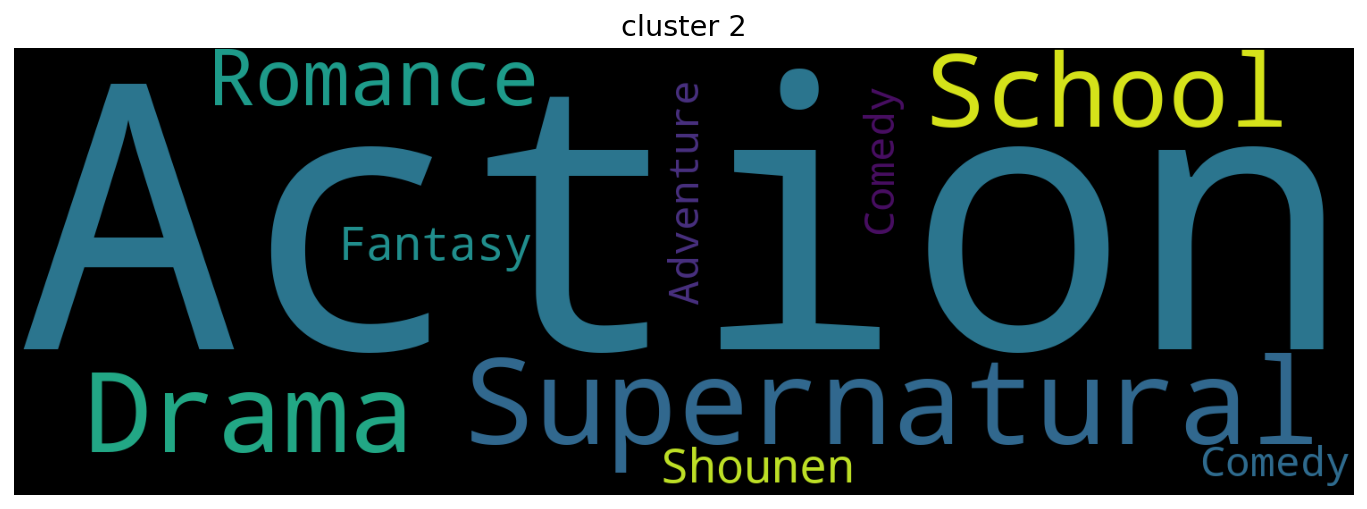

In [ ]:
c2_animelist = list(c2.sort_values(ascending=False)[0:15].index)
c2_data = pd.DataFrame()
c2_data['genre'],c2_data['episode'],c2_data['rating'],c2_data['member'] =  createAnimeInfoList(c2_animelist)
c2_data.iloc[:,1:4] = c2_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c2_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 2","black")



In [ ]:
keyword_occurences[0:5]



[['Action', 9],
 [' Supernatural', 7],
 [' Drama', 6],
 [' School', 5],
 [' Romance', 5]]

In [ ]:
c2_data['episode'].mean()



21.8

In [ ]:
print('cluster 2\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c2_data['episode'].mean(), c2_data['rating'].mean(),c2_data['member'].mean()))

cluster 2
AVG episode : 21.8
AVG movie rating : 8.066666666666666
AVG member : 632348.1333333333


**Cluster 3**

In [ ]:
c3.sort_values(ascending=False)[0:15]

name
Death Note                                                  0.740113
Shingeki no Kyojin                                          0.728814
Code Geass: Hangyaku no Lelouch R2                          0.604520
Steins;Gate                                                 0.593220
Fullmetal Alchemist: Brotherhood                            0.587571
Code Geass: Hangyaku no Lelouch                             0.570621
Mirai Nikki (TV)                                            0.474576
Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.    0.468927
Angel Beats!                                                0.468927
Sen to Chihiro no Kamikakushi                               0.457627
Clannad: After Story                                        0.451977
Toradora!                                                   0.440678
Durarara!!                                                  0.423729
Sword Art Online                                            0.418079
Mahou Shoujo Madoka★Magica   

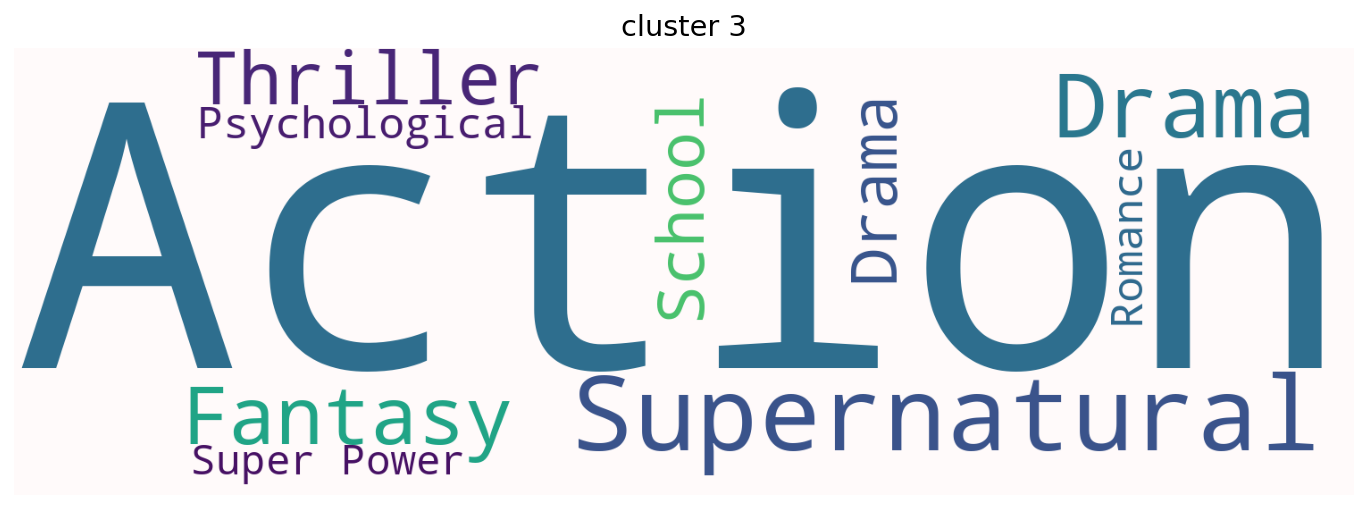

In [ ]:
c3_animelist = list(c3.sort_values(ascending=False)[0:15].index)
c3_data = pd.DataFrame()
c3_data['genre'],c3_data['episode'],c3_data['rating'],c3_data['member'] =  createAnimeInfoList(c3_animelist)
c3_data.iloc[:,1:4] = c3_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c3_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 3","snow")

In [ ]:
keyword_occurences[0:5]

[['Action', 8],
 [' Supernatural', 7],
 [' Drama', 5],
 [' Fantasy', 4],
 [' Thriller', 4]]

In [ ]:
print('cluster 3\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c3_data['episode'].mean(), c3_data['rating'].mean(),c3_data['member'].mean()))



cluster 3
AVG episode : 24.066666666666666
AVG movie rating : 8.133333333333333
AVG member : 664904.5333333333
